# House Price

## Informacin de la base de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("DATA/housing.csv")
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
### Informacion en General
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
### Datos Importantes 
"""Se sabe que cuando mas cerca del oceano es mas caro"""
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Visualizacion de Datos

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

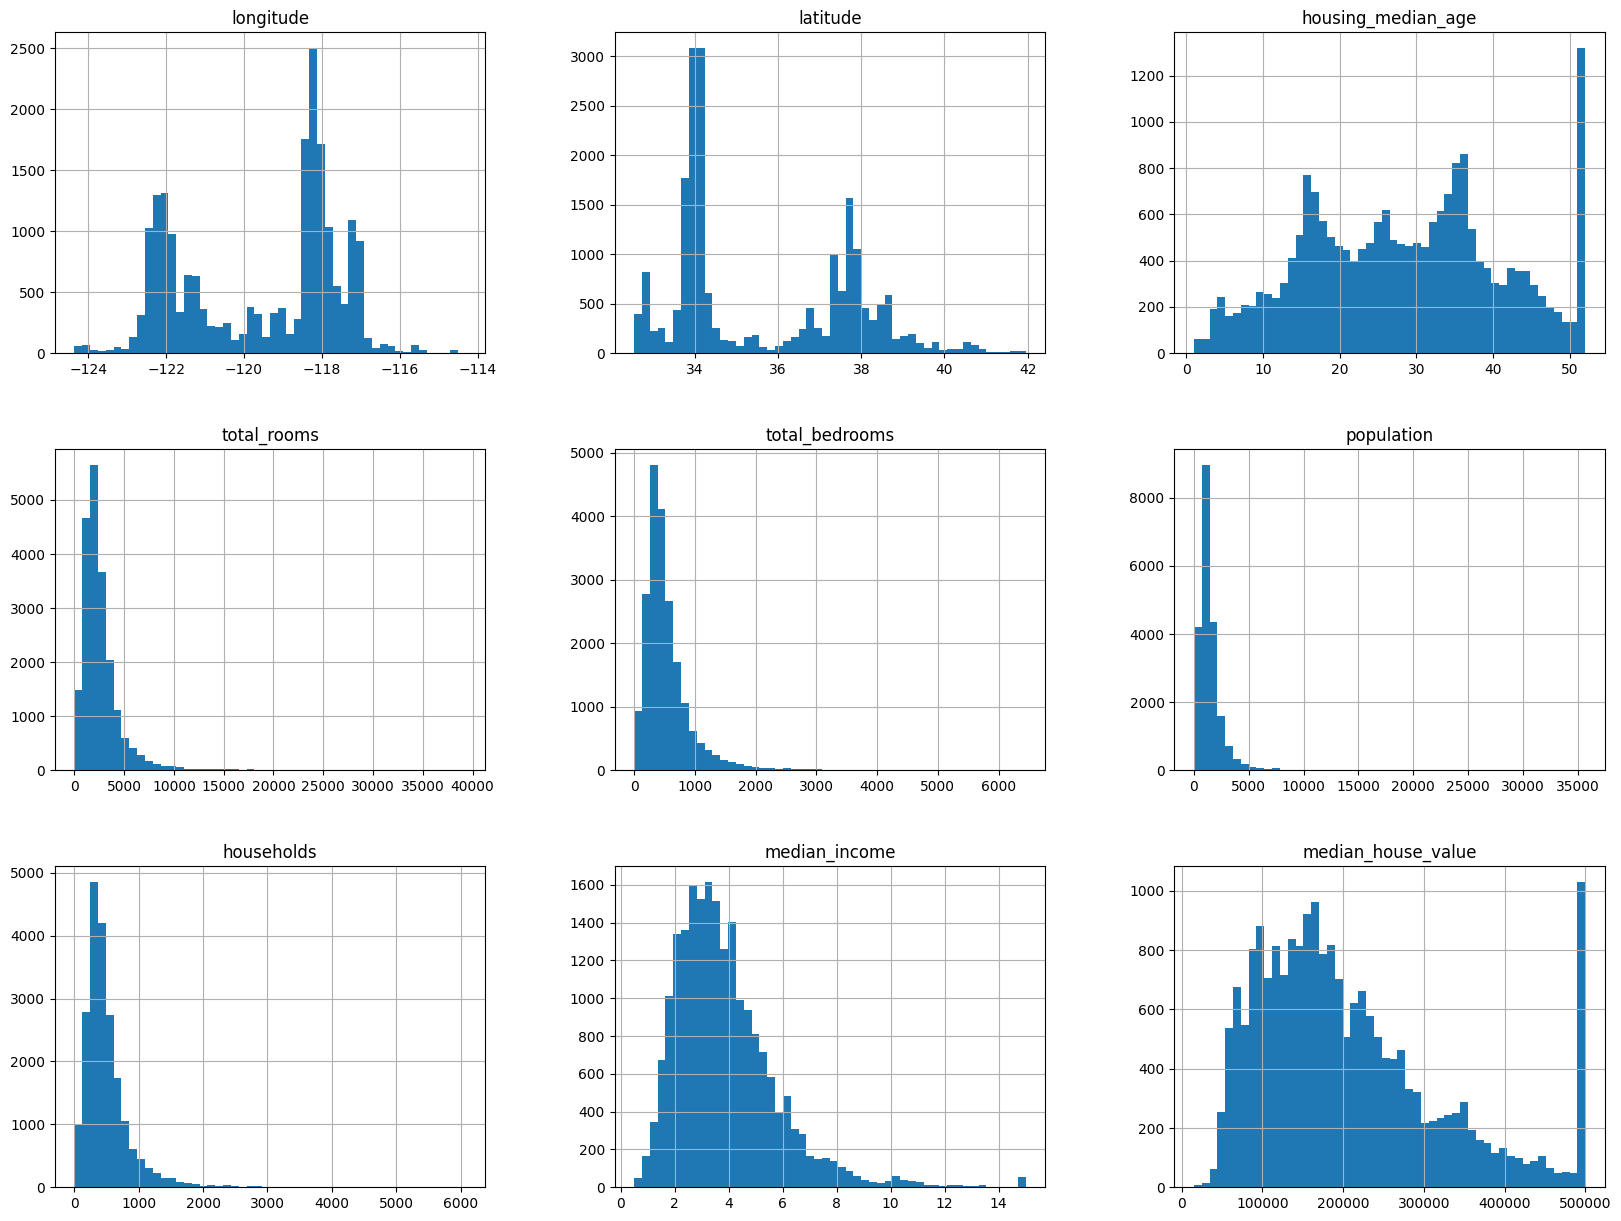

In [6]:
data.hist(bins=50, figsize= (20, 15)) # bins es para la cantidad de barras que se quieren en el histograma y figsize es para el tamaño de la imagen  (ancho, alto) en pulgadas


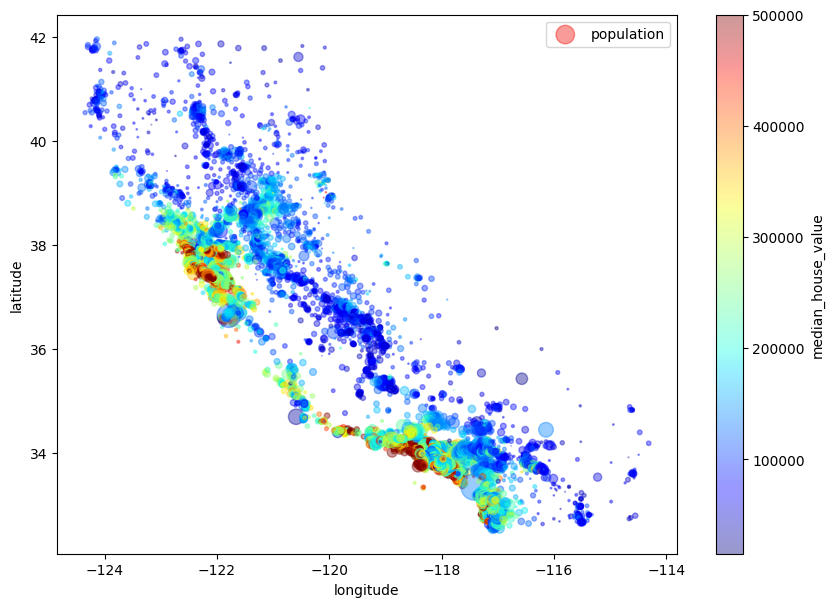

In [7]:
data.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4, s=data["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # alpha es para la transparencia, s es para el tamaño de los puntos, c es para el color de los puntos, cmap es para el color del mapa de calor figsize es para el tamaño de la imagen  (ancho, alto) en pulgadas
plt.legend()
plt.show()

### Correlacion

<Axes: >

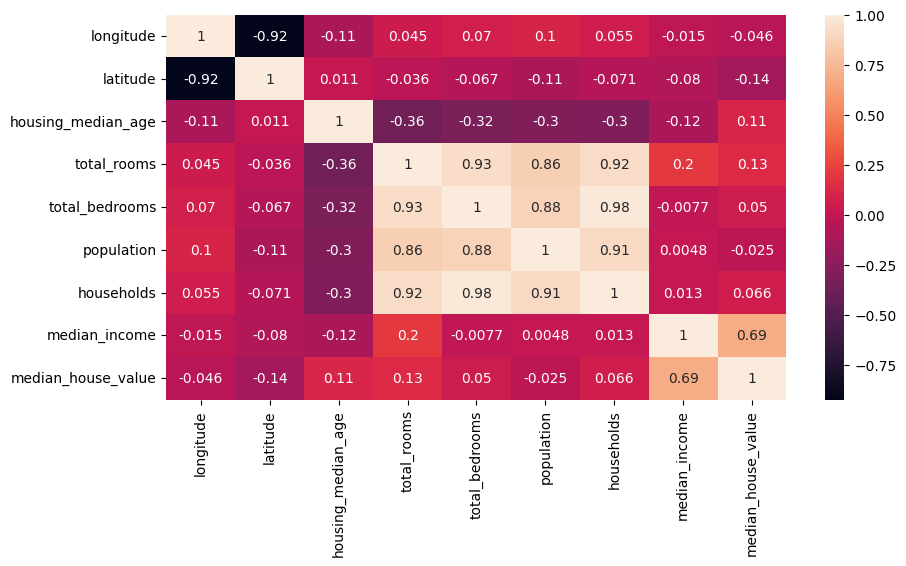

In [8]:

"""Sirve para saber que variables son las que tienen mayor correlacion con la variable que se quiere predecir, es decir la variable que mas peso tiene en la prediccion"""
plt.figure(figsize=(10,5))
sns.heatmap(data.drop('ocean_proximity', axis=1).corr(), annot=True) # annot es para mostrar los valores en la matriz de correlacion


In [9]:
### Matriz de Correlacion
"""Nos muestra la correlacion de cada variable con la variable que queremos predecir, cuando mas cerca de 1 es mas correlacionada y cuando mas cerca de -1 es menos correlacionada"""#
corr_matrix = data.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Combinacion de Atributos
- `rooms_per_household` : Representa el numero medio de habitaciones por hogar en una cierta area. Proporciona una medida de la densidad de habitaciones en una vivienda promedio de esa area
- `bedrooms_per_room`  : Indica la proporcion de dormitorios con respecto al numero total de habitaciones en una cierta area
- `population_per_household` : Representa la densidad de poblacion promedio por hogar en cierta area

In [10]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [11]:
corr_matrix = data.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Limpieza de Datos


#### Total Bedrooms
Rellenar con algo por que esta incompleto
- No se recomienda usar 0s por que puede modificar el resultado final


In [12]:
#### Ejemplo:
x = [1,2,3,np.nan]
x1 = pd.Series(x)
print(x1.mean())


x = [1,2,3,0]
x2 = pd.Series(x)
print(x2.mean()) # Se puede que la media cambie mucho si se rellena con 0

2.0
1.5


In [13]:
### Rellenar total bedrooms
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True) # Rellenar con la mediana y le damos el permiso de sobreescribir los datos con inplace=True
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


C:\Users\santi\AppData\Local\Temp\ipykernel_464\1643907406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True) # Rellenar con la mediana y le damos el permiso de sobreescribir los datos con inplace=True


#### ocean_proximity
Aqui lo que haremos es transformar los valores a valores numericos

In [14]:
# Manipulacion de Dato Categorico
#* Metodo Uno
#! El problema es que puede afecta el rendimiento en un algoritmo de clasificacion
from sklearn.preprocessing import OrdinalEncoder # Nos permite codificar los numeros

data_ocen = data[['ocean_proximity']] # Seleccionamos la columna que queremos codificar,en este caso ocean_proximity 

ordinal_encoder = OrdinalEncoder() # Creamos el objeto ordinal_encoder 
data_ocen_encoded = ordinal_encoder.fit_transform(data_ocen)


In [15]:
#
#* Metodo 2
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder() # Nos permite codificar los datos categoricos en un array de 0 y 1 
data_car_1hot = cat_encoder.fit_transform(data_ocen) # Se puede ver que el resultado es un array de 0 y 1 
print(data_car_1hot) # 0 significa que no es y 1 significa que si es, es decir si es una categoria o no


  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 3)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (20615, 1)	1.0
  (20616, 1)	1.0
  (20617, 1)	1.0
  (20618, 1)	1.0
  (20619, 1)	1.0
  (20620, 1)	1.0
  (20621, 1)	1.0
  (20622, 1)	1.0
  (20623, 1)	1.0
  (20624, 1)	1.0
  (20625, 1)	1.0
  (20626, 1)	1.0
  (20627, 1)	1.0
  (20628, 1)	1.0
  (20629, 1)	1.0
  (20630, 1)	1.0
  (20631, 1)	1.0
  (20632, 1)	1.0
  (20633, 1)	1.0
  (20634, 1)	1.0
  (20635, 1)	1.0
  (20636, 1)	1.0
  (20637, 1)	1.0
  (20638, 1)	1.0
  (20639, 1)	1.0


In [ ]:
#
#* Transformarmos a data frame para poder utiizar el resultad

encoded_df = pd.DataFrame(data_car_1hot.toarray(), columns=cat_encoder.get_feature_names_out()) # Transformamos el array a un data frame, es decir a una tabla con columnas y filas, y nos muestra el nombre de las columnas  con get_feature_names_out(). Cada columan significa una categoria de la variable ocean_proximity
encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


# Arbol de Decision

### Samos la informacion y los Datos

In [ ]:
# Variable Dependiente e Independientes

y = data["median_house_value"].values.reshape(-1,1)
X =data[[
  'median_income',
  'rooms_per_household',
  'total_rooms',
  'housing_median_age',
  'households',
]]

In [ ]:
#Agregar las variables categoricas
data_1 = pd.concat([X, encoded_df], axis=1) # Concatenamos las variables independientes con las variables categoricas, axis significa que se concatenara en las columnas 

X = data_1.values # nos quedamos con los valores de las variables independientes


El r2 es: 0.5934326451877902


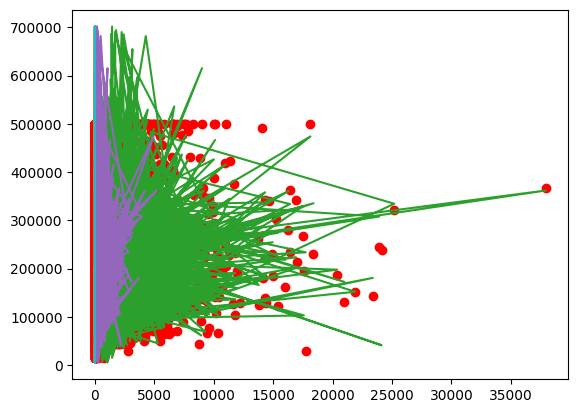

In [ ]:
### Regresion Lineal (Para comparar)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y Prediccion

li_model = LinearRegression()
li_model.fit(X_train, y_train)
y_pred = li_model.predict(X_test)

### Metricas

print(f"El r2 es: {r2_score(y_test, y_pred)}")




### 

# Bosque de Decision